In [1]:
# Import necessary libraries for data analysis, visualization, and machine learning.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
# Import scikit-learn modules for scaling, clustering, metrics, and dimensionality reduction.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

In [2]:
# Load the dataset from the CSV file into a pandas DataFrame.
df = pd.read_csv('Data Collection for ML mini project (Responses) - Form Responses 1.csv')

# Print the shape (rows, columns) of the dataset.
print("Dataset shape:", df.shape)
# Display the first 5 rows for an initial overview.
df.head(10)

Dataset shape: (111, 73)


,Timestamp,Age,"Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n don't provide like 120.64)",Weight\nRange should be between 30 - 150 kg,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,eating_out_per_week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,weekly_hobby_hours,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167 cm,80 kg,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1
5,8/27/2025 13:24:29,Age-22,173,48,Indian,Bengali,Street Food,3,Non-Veg,7,...,Writing,Coding,Coding Club,Cultural Club,25,4,5,1,5,5
6,8/27/2025 13:25:28,Age-21,173,65,Indian,South Indian,Bengali,4,Non-Veg,1,...,Cricket,Gym,Sports Club,Coding Club,40,2,5,4,5,3
7,8/27/2025 13:29:40,Age-21,164,47,Bengali,Chinese,Street Food,3,Non-Veg,6,...,Music,Cricket,Music Club,Coding Club,10,3,3,3,3,4
8,8/27/2025 13:31:25,Age-21,154,57,Mediterranean,Indian,Street Food,5,Vegan,10,...,Music,Robotics,Music Club,Robotics Club,10,1,3,2,2,4
9,8/27/2025 13:36:59,Age-20,165,50,Bengali,Chinese,Mughlai,1,Non-Veg,1,...,Painting,Dance,Music Club,Coding Club,4,4,3,4,4,3


In [3]:
# Select a subset of features for the clustering analysis.
features = ["eating_out_per_week", "food_budget_per_meal_inr", "sweet_tooth_level", "weekly_hobby_hours"]
# Create a working copy to avoid modifying the original DataFrame.\n",
work = df.copy()[features]
print("Columns in work:", work.columns.tolist())
print("dataset shape:", work.shape)

# Perform initial exploratory data analysis (EDA).
display(work.head())          # Show the first 5 rows.
display(work.info())          # Check data types and non-null counts.
display(work.describe(include='all').T)    # Get summary statistics.

Columns in work: ['eating_out_per_week', 'food_budget_per_meal_inr', 'sweet_tooth_level', 'weekly_hobby_hours']
dataset shape: (111, 4)


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
0,7,199,4,0
1,7,150,2,40
2,3,100,2,5
3,7,180,4,10
4,4,200,4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   eating_out_per_week       111 non-null    int64 
 1   food_budget_per_meal_inr  111 non-null    object
 2   sweet_tooth_level         111 non-null    int64 
 3   weekly_hobby_hours        111 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.6+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
eating_out_per_week,111.0,NaN,NaN,NaN,3.405405,2.602022,1.0,1.0,3.0,5.0,10.0
food_budget_per_meal_inr,111,29,100,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sweet_tooth_level,111.0,NaN,NaN,NaN,3.018018,1.243031,1.0,2.0,3.0,4.0,5.0
weekly_hobby_hours,111,33,10,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Clean column names and string data by removing leading/trailing whitespace.
work.columns = work.columns.str.strip()
for c in work.columns:
    if work[c].dtype == object:
        work[c] = work[c].astype(str).str.strip()

In [5]:
# --- 1. Clean 'eating_out_per_week' ---
col = "eating_out_per_week"
# Inspect unique values and summary statistics.
print("Unique values (sample):", work[col].astype(str).unique()[:20])
print("Summary:")
display(work[col].describe())

# Coerce to numeric, which turns any non-numeric entries into NaN.\n",
work[col] = pd.to_numeric(work[col], errors='coerce')
# Clip values to a realistic range (0-14 times per week) to handle outliers.
work[col] = work[col].clip(lower=0, upper=14)

# Verify that no NaNs were created and inspect the value distribution.
print("After coercion: NaNs =", work[col].isnull().sum())
display(work[col].value_counts().sort_index().head(20))

Unique values (sample): ['7' '3' '4' '1' '6' '10' '5' '2' '8']
Summary:


count    111.000000
mean       3.405405
std        2.602022
min        1.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: eating_out_per_week, dtype: float64

After coercion: NaNs = 0


eating_out_per_week
1     36
2     17
3     17
4     11
5      6
6      6
7      9
8      3
10     6
Name: count, dtype: int64

In [6]:
import re
# --- 2. Clean 'food_budget_per_meal_inr' ---
col = "food_budget_per_meal_inr"
# This column has messy data like ranges ('100-200') and text ('rs').
print("Sample unique raw values (first 40):")
print(work[col].astype(str).unique()[:40])

# Define a function to clean text, handle ranges by averaging, and convert to numeric.
def clean_and_average_ranges(value):
    s_value = str(value)
    
    # If the value is a range (contains '-'), average the two numbers.
    if '-' in s_value:
        try:
            low, high = s_value.split('-')
            # Remove non-numeric characters and convert to float.
            low = float(re.sub(r'[^\d.]', '', low))
            high = float(re.sub(r'[^\d.]', '', high))
            return (low + high) / 2
        except:
            return np.nan
    # Otherwise, just remove non-numeric characters.
    else:
        cleaned_value = re.sub(r'[^\d.]', '', s_value)
        if cleaned_value:
            return float(cleaned_value)
        else:
            return np.nan

# Apply the cleaning function to the column.
work[col] = work[col].apply(clean_and_average_ranges)

# Check the data type and count any NaNs that were created.
print("After cleaning with averaging logic:")
print("Data type:", work[col].dtype)
print("NaNs created:", work[col].isnull().sum())

# Fill any resulting NaN values with the column's median.
work[col].fillna(work[col].median(), inplace=True)
print("\nNaNs after filling:", work[col].isnull().sum())

# Display the final summary statistics for the cleaned column.
print("\nFinal statistical summary:")
display(work[col].describe())

Sample unique raw values (first 40):
['199' '150' '100' '180' '200' '7000' '50' '700' '70' '350' '300' '60'
 '299' '5000' '400' '9000' '250' '500' '99' '35' '130' '399' '54' '10000'
 '120' '400-500' '200-300' '499' '100 - 200 rs']
After cleaning with averaging logic:
Data type: float64
NaNs created: 0

NaNs after filling: 0

Final statistical summary:


C:\Users\nafiu\AppData\Local\Temp\ipykernel_25316\713552188.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  work[col].fillna(work[col].median(), inplace=True)


count      111.000000
mean       471.792793
std       1466.060690
min         35.000000
25%        100.000000
50%        150.000000
75%        299.000000
max      10000.000000
Name: food_budget_per_meal_inr, dtype: float64

In [7]:
# Convert the cleaned 'food_budget_per_meal_inr' column to integers for consistency.
work[col] = work[col].astype(int)
col = "food_budget_per_meal_inr"
print("Sample unique raw values (first 40):")
print(work[col].astype(str).unique()[:40])

Sample unique raw values (first 40):
['199' '150' '100' '180' '200' '7000' '50' '700' '70' '350' '300' '60'
 '299' '5000' '400' '9000' '250' '500' '99' '35' '130' '399' '54' '10000'
 '120' '450' '499']


In [8]:
# --- 3. Clean 'sweet_tooth_level' ---
col = "sweet_tooth_level"
print("Unique (sample):", work[col].astype(str).unique()[:20])
display(work[col].describe())

# Coerce to a nullable integer type to handle potential NaNs.
work[col] = pd.to_numeric(work[col], errors='coerce').round().astype('Int64')
# Clip values to the expected 1-5 scale.
work[col] = work[col].clip(lower=1, upper=5)

# Check for NaNs and show the final value distribution.
print("NaNs in sweet_tooth_level after coercion:", work[col].isnull().sum())
display(work[col].value_counts().sort_index())

Unique (sample): ['4' '2' '3' '5' '1']


count    111.000000
mean       3.018018
std        1.243031
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: sweet_tooth_level, dtype: float64

NaNs in sweet_tooth_level after coercion: 0


sweet_tooth_level
1    17
2    16
3    43
4    18
5    17
Name: count, dtype: Int64

In [9]:
# --- 4. Clean 'weekly_hobby_hours' ---
col = "weekly_hobby_hours"
# This column contains text like 'hours', 'No', etc.
print("Sample raw values (first 50 unique):")
print(work[col].astype(str).unique()[:50])

# Remove all non-digit characters using regex and convert to numeric.
work[col] = work[col].astype(str).str.replace(r'[^\d.]', '', regex=True).str.strip()
work[col] = pd.to_numeric(work[col], errors='coerce')

# Check for NaNs and review summary statistics.
print("NaNs after cleaning:", work[col].isnull().sum())
display(work[col].describe())

# Clip values to the 0-40 range as instructed in the survey.
work[col] = work[col].clip(lower=0, upper=40)
display(work[col].value_counts().sort_index().head(40))

Sample raw values (first 50 unique):
['0' '40' '5' '10' '25' '4' '38' '20' '2' '9' '1' '14 hours' '7' '04-May'
 'Not fixed' '4hrs' '18' '14' '28' '30' '15' '3' '8' '35' '13' '15 hrs'
 'Kk' '16' '6' '2hrs' '4-5h' 'No' '33']
NaNs after cleaning: 3


count    108.000000
mean      13.592593
std       11.524080
min        0.000000
25%        5.000000
50%       10.000000
75%       20.000000
max       45.000000
Name: weekly_hobby_hours, dtype: float64

weekly_hobby_hours
0.0      3
1.0      5
2.0      6
3.0      4
4.0      7
5.0     11
6.0      2
7.0      3
8.0      1
9.0      2
10.0    22
13.0     1
14.0     2
15.0     7
16.0     1
18.0     1
20.0     6
25.0     4
28.0     2
30.0     9
33.0     1
35.0     1
38.0     1
40.0     6
Name: count, dtype: int64

In [10]:
# Identify rows that became NaN after cleaning 'weekly_hobby_hours'.
bad_hobby = work[work[col].isnull()]
print("Rows with missing hobby hours:", len(bad_hobby))
display(bad_hobby.head(10))

Rows with missing hobby hours: 3


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
26,7,100,1,NaN
77,3,99,2,NaN
103,3,150,1,NaN


In [11]:
# Impute the missing 'weekly_hobby_hours' values with the column's median.
med = int(work[col].median(skipna=True))
work[col] = work[col].fillna(med)
print("Imputed weekly_hobby_hours with median:", med)

Imputed weekly_hobby_hours with median: 10


In [12]:
# Verify that there are no more missing values in the column.
bad_hobby = work[work[col].isnull()]
print("Rows with missing hobby hours:", len(bad_hobby))
display(bad_hobby.head(10))

Rows with missing hobby hours: 0


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours


In [13]:
# Final check: Display data types, null counts, and summary stats to confirm data is clean.
print("Final dtypes:\n", work.dtypes)
print("\nMissing counts per column:\n", work.isnull().sum())
print("\nBasic stats:")
display(work.describe().T)

Final dtypes:
 eating_out_per_week           int64
food_budget_per_meal_inr      int64
sweet_tooth_level             Int64
weekly_hobby_hours          float64
dtype: object

Missing counts per column:
 eating_out_per_week         0
food_budget_per_meal_inr    0
sweet_tooth_level           0
weekly_hobby_hours          0
dtype: int64

Basic stats:


,count,mean,std,min,25%,50%,75%,max
eating_out_per_week,111.0,3.405405,2.602022,1.0,1.0,3.0,5.0,10.0
food_budget_per_meal_inr,111.0,471.792793,1466.06069,35.0,100.0,150.0,299.0,10000.0
sweet_tooth_level,111.0,3.018018,1.243031,1.0,2.0,3.0,4.0,5.0
weekly_hobby_hours,111.0,13.45045,11.264376,0.0,5.0,10.0,20.0,40.0


--- Correlation Heatmap ---


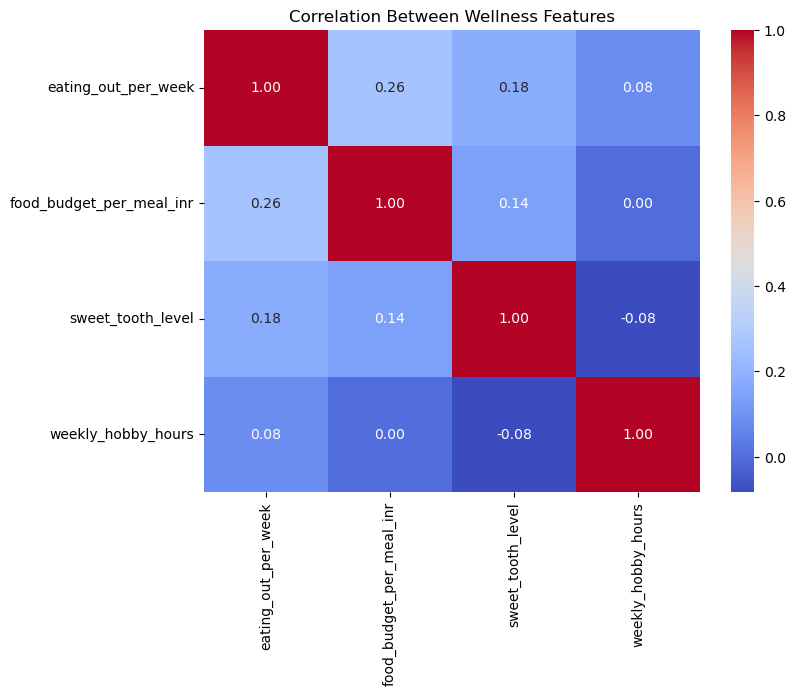


--- Original Data (First 5 Rows) ---


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
0,7,199,4,0.0
1,7,150,2,40.0
2,3,100,2,5.0
3,7,180,4,10.0
4,4,200,4,5.0



--- Scaled Data (First 5 Rows) ---


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
0,1.387727,-0.186916,0.793572,-1.199485
1,1.387727,-0.220490,-0.822694,2.367637
2,-0.156511,-0.254750,-0.822694,-0.753595
3,1.387727,-0.199935,0.793572,-0.307704
4,0.229549,-0.186231,0.793572,-0.753595



--- Verification: Mean and Standard Deviation of Scaled Data ---


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
count,111.00,111.00,111.00,111.00
mean,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-0.93,-0.30,-1.63,-1.20
25%,-0.93,-0.25,-0.82,-0.75
50%,-0.16,-0.22,-0.01,-0.31
75%,0.62,-0.12,0.79,0.58
max,2.55,6.53,1.60,2.37


In [14]:
import seaborn as sns

# --- 1. Exploratory Data Analysis (EDA) ---
print("--- Correlation Heatmap ---")
plt.figure(figsize=(8, 6))
# Visualize the correlation between features to identify any strong relationships.
corr_matrix = work.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Wellness Features')
plt.show()


# --- 2. Feature Scaling ---
# Initialize the scaler.
scaler = StandardScaler()

# Standardize features by removing the mean and scaling to unit variance.
# This is crucial for distance-based algorithms like K-Means.
scaled_features = scaler.fit_transform(work)

# Convert the scaled data back into a DataFrame for readability.
scaled_df = pd.DataFrame(scaled_features, columns=work.columns)

print("\n--- Original Data (First 5 Rows) ---")
display(work.head())

print("\n--- Scaled Data (First 5 Rows) ---")
display(scaled_df.head())

print("\n--- Verification: Mean and Standard Deviation of Scaled Data ---")
# A successful scaling results in a mean near 0 and a standard deviation near 1.
display(scaled_df.describe().round(2))

In [15]:
# Save the cleaned and scaled DataFrame to a new CSV file for easy access.
scaled_df.to_csv('wellness_personas_cleaned_scaled.csv', index=False)

print("Cleaned and scaled data has been saved to 'wellness_personas_cleaned_scaled.csv'")

Cleaned and scaled data has been saved to 'wellness_personas_cleaned_scaled.csv'


In [16]:
# --- Find the Optimal Number of Clusters (k) ---
# Load the cleaned and scaled data.
scaled_df = pd.read_csv('wellness_personas_cleaned_scaled.csv')

# Define the range of k values to test.
k_range = range(2, 11)

# Store results for different evaluation methods.
inertia_values = []      # For the Elbow Method
silhouette_scores = []   # For Silhouette Analysis

# Iterate through each k to find the best number of clusters.
for k in k_range:
    # Initialize and fit the K-Means model for the current k.
    # n_init=10 runs the algorithm 10 times to find the best outcome.
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    
    # Append the inertia (within-cluster sum of squares).
    inertia_values.append(kmeans.inertia_)
    
    # Append the average silhouette score.
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

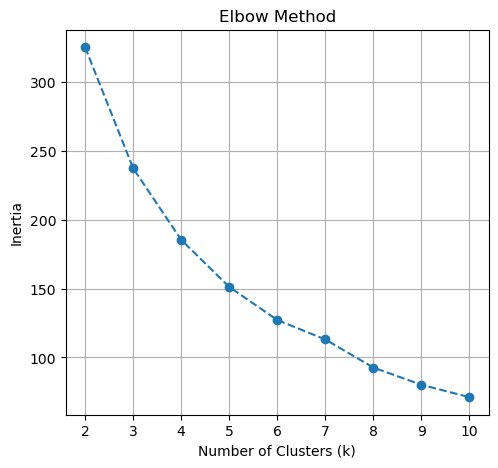

In [17]:
# --- 1. Plot the Elbow Method ---
# The 'elbow' is the point where inertia starts to decrease less rapidly,
# suggesting an optimal k.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

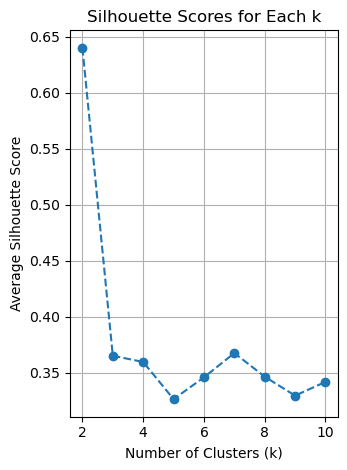

In [18]:
# --- 2. Plot the Silhouette Scores ---
# The silhouette score measures cluster separation. A higher score is better.
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Each k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# --- Final Clustering ---
# Based on the Elbow Method and Silhouette Scores, k=4 appears to be a good choice.
# Initialize and train the final model with k=4.
final_kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
final_kmeans.fit(scaled_df)

# Get the cluster labels assigned to each data point.
cluster_labels = final_kmeans.labels_

# Add the resulting cluster labels back to the original (cleaned) DataFrame.
work['cluster'] = cluster_labels

print("DataFrame with Numerical Cluster Labels:")
display(work.head(40))

DataFrame with Numerical Cluster Labels:


d:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours,cluster
0,7,199,4,0.0,3
1,7,150,2,40.0,1
2,3,100,2,5.0,0
3,7,180,4,10.0,3
4,4,200,4,5.0,0
5,7,100,3,25.0,3
6,1,200,3,40.0,1
7,6,100,3,10.0,3
8,10,7000,5,10.0,2
9,1,50,4,4.0,0


In [20]:
# --- Analyze Cluster Characteristics ---
# Group data by cluster and calculate the average value for each feature.
# This helps in understanding each cluster's profile and creating personas.
cluster_summary = work.groupby('cluster').mean()

print("\n--- Cluster Summary (Averages for each feature) ---")
display(cluster_summary)


--- Cluster Summary (Averages for each feature) ---


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours
cluster,,,,
0,2.138462,204.492308,3.0,7.600000
1,2.857143,200.857143,2.47619,32.190476
2,7.750000,7750.000000,4.25,13.250000
3,7.047619,183.761905,3.380952,12.857143


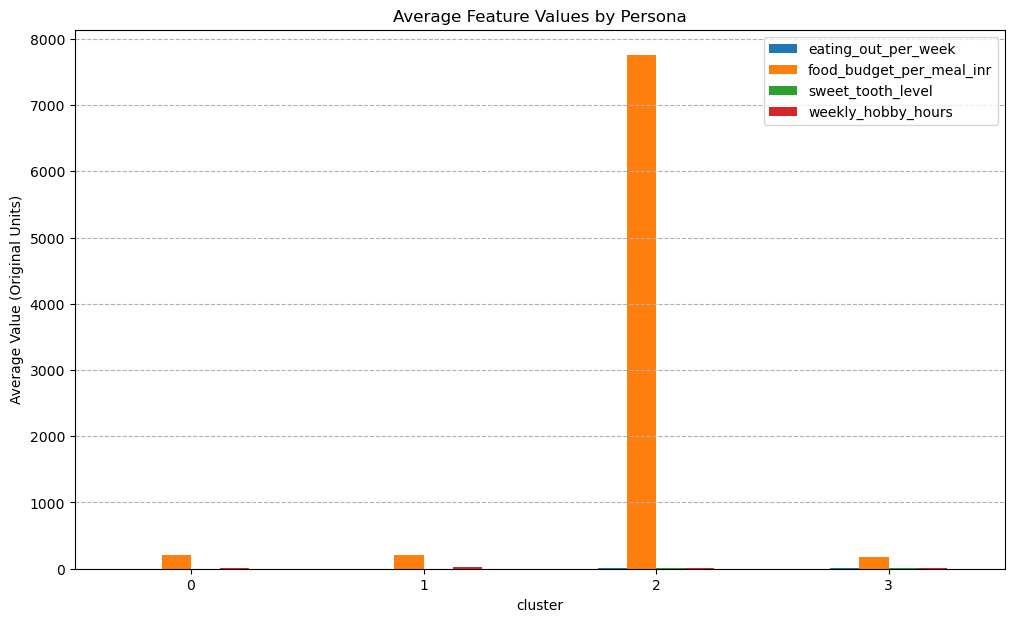

In [ ]:
# --- Visualizing Cluster Characteristics ---
# Creating a bar chart to compare the average feature values for each persona.
cluster_summary.plot(kind='bar', figsize=(12, 7))
plt.title('Average Feature Values by Persona')
plt.ylabel('Average Value (Original Units)')
plt.xticks(rotation=0) # Keeping persona names horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

In [22]:
# --- Create Personas ---
# Based on the cluster summary, define descriptive names for each persona.
persona_map = {
    0: 'The Balanced Mainstream',
    1: 'The Passionate Hobbyists',
    2: 'The High-End Spenders',
    3: 'The Everyday Eaters',
}

# Create a new 'persona' column by mapping the names to the cluster numbers.
work['persona'] = work['cluster'].map(persona_map)

print("\nDataFrame with Descriptive Persona Names:")
display(work.head())


DataFrame with Descriptive Persona Names:


,eating_out_per_week,food_budget_per_meal_inr,sweet_tooth_level,weekly_hobby_hours,cluster,persona
0,7,199,4,0.0,3,The Everyday Eaters
1,7,150,2,40.0,1,The Passionate Hobbyists
2,3,100,2,5.0,0,The Balanced Mainstream
3,7,180,4,10.0,3,The Everyday Eaters
4,4,200,4,5.0,0,The Balanced Mainstream


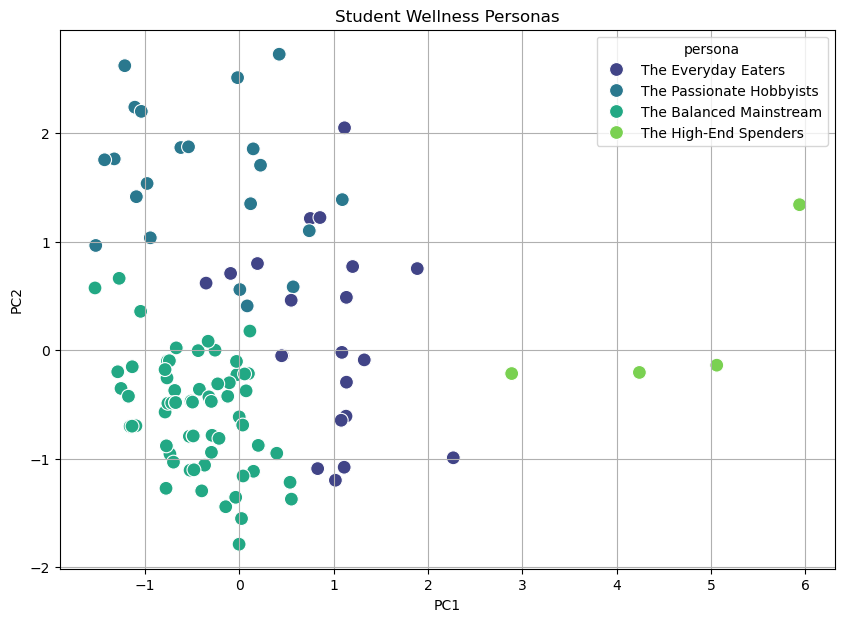

In [23]:
# --- Visualize the Clusters using PCA ---
# Use Principal Component Analysis (PCA) to reduce data from 4 dimensions to 2 for visualization.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Add the descriptive persona names to the PCA results for color-coding the plot.
pca_df['persona'] = work['persona'] 

# Create a scatter plot to visualize the distinct clusters.
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='persona', data=pca_df, palette='viridis', s=100)
plt.title('Student Wellness Personas')
plt.grid(True)
plt.show()

In [24]:
# --- Final Model Evaluation ---
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the final k=4 model to quantify its performance.
# A score closer to 1 indicates well-defined and separated clusters.
final_s_score = silhouette_score(scaled_df, final_kmeans.labels_)

print(f"Final Silhouette Score for the model is: {final_s_score:.3f}")

Final Silhouette Score for the model is: 0.359


Based on the clustering analysis, four distinct student wellness personas were identified:

    The Balanced Mainstream (Cluster 0): This is the largest group, characterized by moderate habits across the board. They eat out infrequently, have a standard food budget, and spend a modest amount of time on hobbies.

    The Passionate Hobbyists (Cluster 1): This group is defined by spending a significantly high number of hours on hobbies (average of 32 hours/week) while maintaining a low food budget and eating out less often.

    The High-End Spenders (Cluster 2): A small but distinct group that spends an exceptionally large amount on food per meal (average of ₹7750). Their other habits are more moderate.

    The Everyday Eaters (Cluster 3): These students eat out very frequently (average of 7 times/week) but maintain a low to moderate food budget and have a higher sweet tooth level.